### Checklist

Variables that I have:
'country','points','price','variety',(province)

Country - how many countries, how their distributed
Points - how points are distributed  mean median max mode
Price - price vs country, price vs variey
Variety - variety in each country 



#### How to talk about the data

Analyze the shape of a graph to describe the distribution of data. ...
Describe the shape of a dot plot. ...
Describe the distribution of data using the mean absolute deviation. ...
Express mean, median, and mode. ...
Identify clusters, peaks and gaps in a dot plot. ...
Construct a box plot.


In [ ]:
#historgram of each variable
#broken up by country
#broken up by variety

# notes

Compare 15 dollar wines in different varieties
Compare 10, 15, 20 bottles - to variety, country

what is the distribution of values across varieties

# About The Dataset


#### Background
The data was scraped from WineEnthusiast on November 22nd, 2017.

#### Addressing Missing Data
There are missing data within the price column. 


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
wine_data_og = pd.read_csv('winemag-data-130k-v2.csv')
wine_data = wine_data_og[['country','points','price','variety',]]

In [8]:
## attempt to filter out USA to california

#usa = wine_data_og[wine_data_og['country']=='USA']
#wine_data.usa.unique('province')

##No Blends
#wine_data_no_blend = wine_data[wine_data['variety']!='Red Blend']

In [9]:
##Null Values
wine_data_less_price = wine_data[np.isfinite(wine_data['price'])]

# Summary of the  Dataset

## Summary: Price

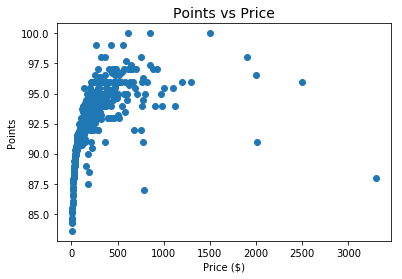

In [10]:
price_v_points_3300 = wine_data_less_price[(wine_data_less_price['price']>=4) & (wine_data_less_price['price']<=3300)]
price_v_points_agg_3300 = price_v_points_3300.groupby('price', as_index=False)['points'].agg(np.mean)


plt.scatter(price_v_points_agg_3300['price'], price_v_points_agg_3300['points'])
plt.title('Points vs Price', fontsize=14)
plt.xlabel('Price ($)')
plt.ylabel('Points')
plt.show()

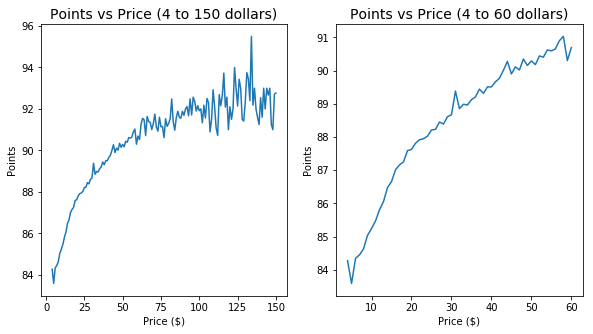

In [21]:
price_v_points_60 = wine_data_less_price[(wine_data_less_price['price']>=4) & (wine_data_less_price['price']<=60)]
price_v_points_agg_60 = price_v_points_60.groupby('price', as_index=False)['points'].agg(np.mean)

price_v_points150 = wine_data_less_price[(wine_data_less_price['price']>=4) & (wine_data_less_price['price']<=150)]
price_v_points_agg_150 = price_v_points150.groupby('price', as_index=False)['points'].agg(np.mean)

plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
plt.plot(price_v_points_agg_150['price'], price_v_points_agg_150['points'])
plt.title('Points vs Price (4 to 150 dollars)', fontsize=14)
plt.xlabel('Price ($)')
plt.ylabel('Points')

plt.subplot(1,3,2)
plt.plot(price_v_points_agg_60['price'], price_v_points_agg_60['points'])
plt.title('Points vs Price (4 to 60 dollars)', fontsize=14)
plt.xlabel('Price ($)')
plt.ylabel('Points')
plt.show()

/usr/local/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0,0.5,'Amount of Bottles')

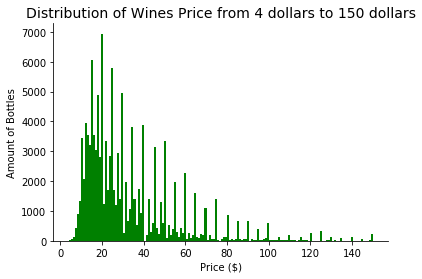

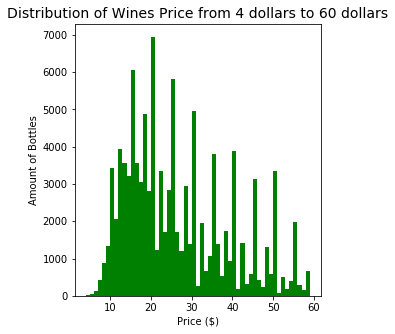

In [23]:
filter_wine_prices_150 = wine_data_less_price[(wine_data_less_price['price']>=4) & (wine_data_less_price['price']<=150)]
filter_wine_prices_60 = wine_data_less_price[(wine_data_less_price['price']>=4) & (wine_data_less_price['price']<=60)]

plt.hist(filter_wine_prices_150['price'], bins='auto', color='green')
plt.title('Distribution of Wines Price from 4 dollars to 150 dollars', fontsize=14)
plt.xlabel('Price ($)')
plt.ylabel('Amount of Bottles')
ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False) 
plt.show

plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
plt.hist(filter_wine_prices_60['price'], bins=range(4,60), color='green')
plt.title('Distribution of Wines Price from 4 dollars to 60 dollars', fontsize=14)
plt.xlabel('Price ($)')
plt.ylabel('Amount of Bottles')
 
#more likely that bottles are priced at 10$ intervals

## Summary: Countries

In [ ]:
wine_data.country.value_counts().head(20).plot(kind='bar')

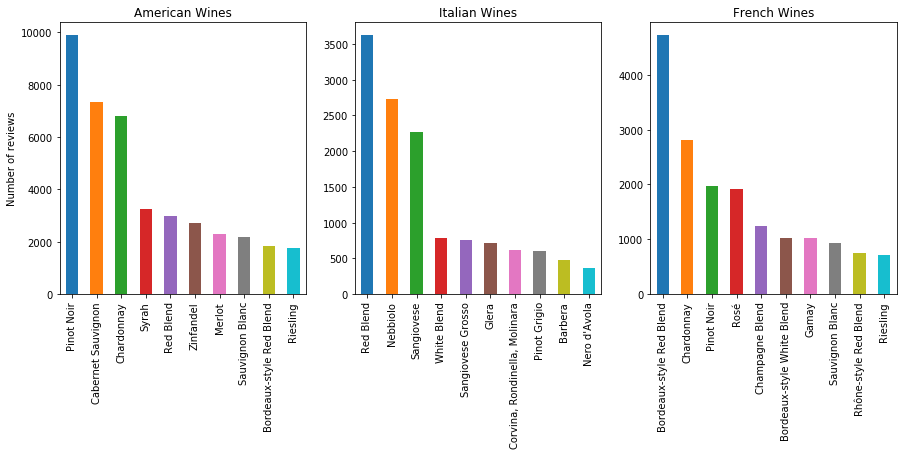

In [13]:
plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
wine_data[wine_data.country=='US'].variety.value_counts().head(10).plot(kind='bar')
plt.title('American Wines')
plt.ylabel('Number of reviews')

plt.subplot(1,3,2)
wine_data[wine_data.country=='Italy'].variety.value_counts().head(10).plot(kind='bar')
plt.title('Italian Wines')

plt.subplot(1,3,3)
wine_data[wine_data.country=='France'].variety.value_counts().head(10).plot(kind='bar')
plt.title('French Wines')

plt.show()

### Countries with Highest Quality Wine

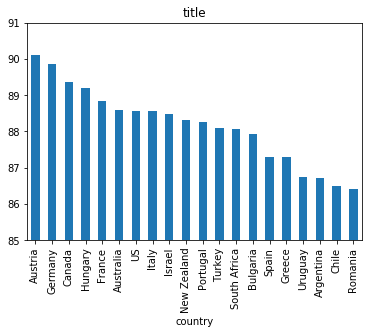

In [14]:
top20_countries_byvolume_list = wine_data.country.value_counts().head(20).index.values.tolist()

points_country = wine_data[wine_data.country.isin(top20_countries_byvolume_list)][['points','country']]
countrypoints_group = points_country.groupby('country')
countrypoints_mean = countrypoints_group.mean()

highestquality_bycountry = countrypoints_mean.sort_values(by='points', ascending=False).head(20).plot(kind='bar', ylim=(85,91), legend=None,title="title", )


## Summary: Varieties



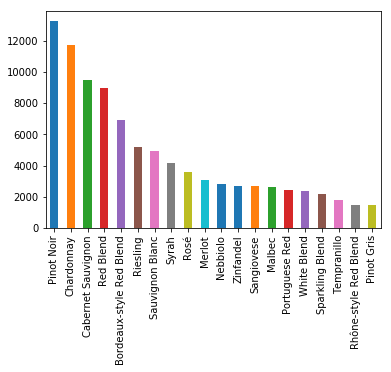

In [15]:
wine_data.variety.value_counts().head(20).plot(kind='bar')

<Container object of 6 artists>

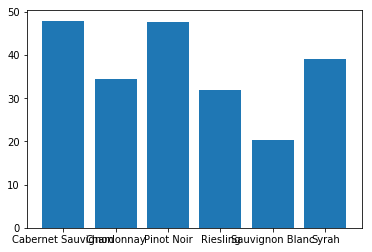

In [64]:
#### most common varities - which is cheapest

#top 3 red
pinot_noir_all = wine_data[(wine_data['variety'] == "Pinot Noir")]
cab_sauv_all = wine_data[(wine_data['variety'] == "Cabernet Sauvignon")]
syrah_all = wine_data[(wine_data['variety'] == "Syrah")]

red_all_global = pinot_noir_all.append(cab_sauv_all).append(syrah_all)
red_all_global_agg = red_all_global.groupby('variety', as_index=False)['price'].agg('mean')

#top 3 white
chard_all = wine_data[(wine_data['variety'] == "Chardonnay")]
riesling_all = wine_data[(wine_data['variety'] == "Riesling")]
sauv_b_all = wine_data[(wine_data['variety'] == "Sauvignon Blanc")]

white_all_global = chard_all.append(riesling_all).append(sauv_b_all)
white_all_global_all_global_agg = white_all_global.groupby('variety', as_index=False)['price'].agg('mean')

red_and_white_agg = red_all_global_agg.append(white_all_global_all_global_agg)

plt.bar(red_and_white_agg['variety'],red_and_white_agg['price'])
#red_and_white_agg.price.plot(kind='bar')

## Summary: Points

/usr/local/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


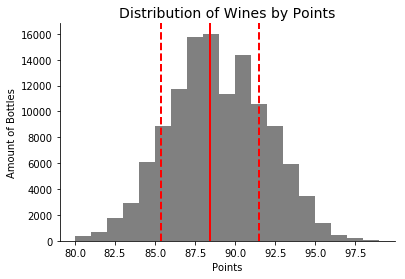

In [17]:
#US, Italy, France
#US_wine_points = wine_data_less_price[wine_data_less_price['country'] == "US"][['country','points']]
#France_wine_points = wine_data_less_price[wine_data_less_price['country'] == "France"][['country','points']]
#Italy_wine_points = wine_data_less_price[wine_data_less_price['country'] == "Italy"][['country','points']]

#All
plt.hist(wine_data_less_price['points'], bins=range(80,100), color='grey')
plt.axvline(wine_data_less_price['points'].mean(), color='r', linestyle='solid', linewidth=2)
plt.axvline(wine_data_less_price['points'].mean() + wine_data_less_price['points'].std(), color='r', linestyle='dashed', linewidth=2)
plt.axvline(wine_data_less_price['points'].mean()-wine_data_less_price['points'].std(), color='r', linestyle='dashed', linewidth=2)

plt.title('Distribution of Wines by Points', fontsize=14)
plt.xlabel('Points')
plt.ylabel('Amount of Bottles')
ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False) 
plt.show()


# Q1 How do affordable wines (less then 20) differ in quality? /does it matter if i spend an extra 5 bucks?

In [73]:
price_below_10 = wine_data[(wine_data['price'] <= 10)]
price_11to15 = wine_data[(wine_data['price'] > 10) & (wine_data['price'] <= 15)]
price_16to20 = wine_data[(wine_data['price'] > 15) & (wine_data['price'] <= 20)]

price_below_10['group'] = '$10 and Under'
price_11to15['group'] = '$11 - $15'
price_16to20['group'] = '$16 - $20'

price_all_global = price_below_10.append(price_11to15).append(price_16to20)

#price_all_agg = price_all.groupby('price', as_index=False)['points'].agg(np.mean)


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-vie

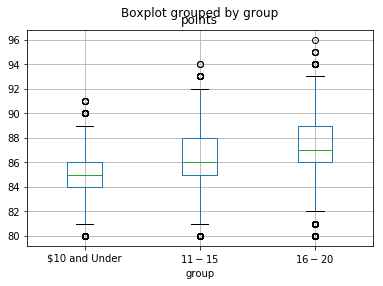

In [71]:
price_all_global.boxplot(column='points',by='group')

#reasonable chance that random $16 and selected bottle, slim change that under 10 just as good - tails overlapping





p-values

## how much do you have to spend to get a consistent average bottle of wine

In [74]:
print(price_16to20)

             country  points  price                   variety      group
6              Italy      87   16.0                  Frappato  $16 - $20
10                US      87   19.0        Cabernet Sauvignon  $16 - $20
21                US      87   20.0                Pinot Noir  $16 - $20
22             Italy      87   19.0               White Blend  $16 - $20
28             Italy      87   17.0                 Red Blend  $16 - $20
29                US      86   16.0              Chenin Blanc  $16 - $20
34                US      86   20.0           Sauvignon Blanc  $16 - $20
40             Italy      86   17.0                Catarratto  $16 - $20
48                US      86   16.0           Sauvignon Blanc  $16 - $20
61             Italy      86   17.0                Sangiovese  $16 - $20
77         Australia      86   18.0                Chardonnay  $16 - $20
81             Spain      86   16.0                  Albariño  $16 - $20
83         Australia      86   20.0                

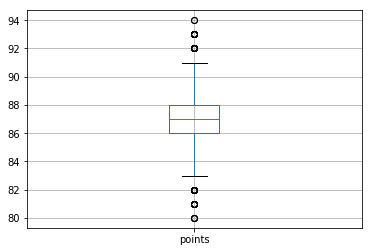

In [20]:
####### trouble

price_below_20_california = wine_data[(wine_data['price'] <= 20) & (wine_data['country'] == 'US')]
price_below_20_france = wine_data[(wine_data['price'] <= 20) & (wine_data['country'] == 'France')]
price_below_20_italy = wine_data[(wine_data['price'] <= 20) & (wine_data['country'] == 'Italy')]

price_below_20_all = price_below_20_california.append(price_below_20_france).append(price_below_20_italy)

#price_below_20_california['group'] = 'Cali'
#price_below_20_france['group'] = 'France'
#price_below_20_italy['group'] = 'Italy'

price_below_20_italy.boxplot(column='points')
#price_below_20_france.boxplot(column='points')


### Question 2

### Which countries have the most affordable- above average - wines?


which countries appears most often =  in wines that are $20 below / and above average 87

look at top  5 in occurences

### Question 3

#### Out of the most common varieties - which is cheapest, or are they the same?  - 42

Or

#### From the top 10 (most common) wines from 3 countries  - who has the highest rated wine?



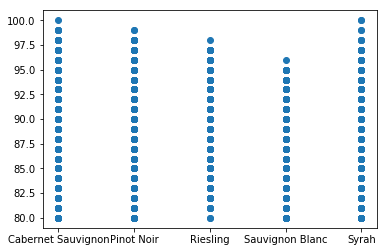

In [62]:
#messy
#price_below_20_italy.boxplot(column='points')


red_white_all_global = white_all_global.append(red_all_global)
plt.scatter(red_white_all_global['variety'], red_white_all_global['points'])